### Loading Dataset

In [255]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [256]:
data= pd.read_csv('Uber Request Data.csv')

### Preliminary Analysis

In [257]:
#preliminary view at data
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [258]:
# basic info for a data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [259]:
data['Pickup point'].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

In [260]:
data['Status'].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

In [ ]:
# Feedback: 
# The data is converted to a clean format suitable for analysis in Python. Good job on that. However, the code could have been more concise. Am mentioning the reference for the same:
# #Renaming the Date/Time Colomn
# df = df.rename(columns={'Date/Time': 'Date_time'})

# #Converting the Date_time type into Datetime
# df['Date_time'] = pd.to_datetime(df['Date_time'])

# #Adding usufull colomns
# df['Month'] = df['Date_time'].dt.month_name()
# df['Weekday'] = df['Date_time'].dt.weekday_name
# df['Day'] = df['Date_time'].dt.day
# df['Hour'] = df['Date_time'].dt.hour
# df['Minute'] = df['Date_time'].dt.minute


In [261]:
# Correcting data types
data['Driver id'] = data['Driver id'].astype(str)
data['Request id'] = data['Request id'].astype(str)



In [262]:
pd.to_datetime(['12/7/2016'],dayfirst=True)

DatetimeIndex(['2016-07-12'], dtype='datetime64[ns]', freq=None)

In [263]:
# Getting correct data types
data['Request timestamp']= pd.to_datetime(data['Request timestamp'],dayfirst=True)
data['Drop timestamp']= pd.to_datetime(data['Drop timestamp'],dayfirst=True)

In [264]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47


In [265]:
#Checking for any ambiguous data
data[(data['Drop timestamp']-data['Request timestamp']).dt.days <0]

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp


#### *_Q1. Visually identify the most pressing problems for Uber._* 
- Hint: Create plots to visualize the frequency of requests that get canceled or show 'no cars available'; identify the most problematic types of requests (city to airport/airport to city etc.) and the time slots (early mornings, late evenings etc.) using plots


### Availability of Cars

Text(0, 0.5, 'Frequency')

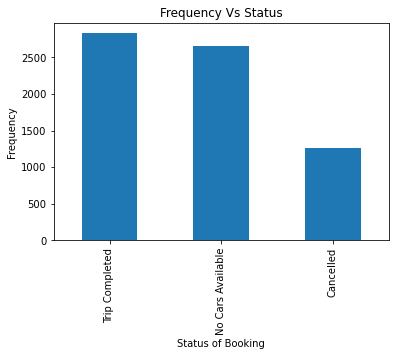

In [267]:
# Plot of status 
data['Status'].value_counts().plot.bar()
plt.xlabel('Status of Booking')
plt.title('Frequency Vs Status')
plt.ylabel('Frequency')
# More of them have no cars available instead of Cancelled

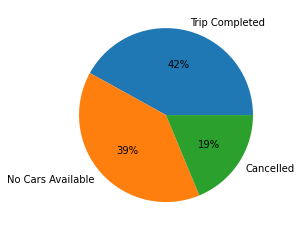

In [233]:
plt.pie(data['Status'].value_counts(),labels=['Trip Completed','No Cars Available', 'Cancelled'],autopct = '%0.0f%%')
plt.show()
# 39 % of times cars werent available

In [ ]:
# #Grouping by Hour 
# df_hour_grouped = df.groupby(['Hour']).count()

# #Creating the sub dataframe
# df_hour = pd.DataFrame({'Number_of_trips':df_hour_grouped.values[:,0]}, index = df_hour_grouped.index) 

# df_hour.head()
# df_hour.plot(kind='bar', figsize=(8,6))

# plt.ylabel('Number of Trips')
# plt.title('Trips by Hour')

# plt.show()

Text(0, 0.5, 'Requests Count')

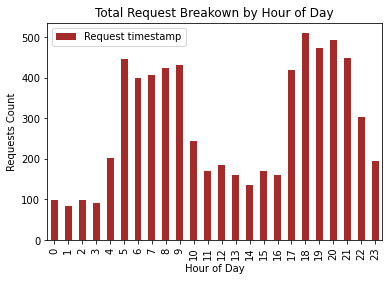

In [271]:
# Plot of requests count in a day
pd.DataFrame(data['Request timestamp'].dt.hour.value_counts()).sort_index().plot.bar(color='brown')
plt.xlabel('Hour of Day')
plt.title('Total Request Breakown by Hour of Day')
plt.ylabel('Requests Count')
#Maximum demand is in Morning and Evening 5 to 9 

Text(0, 0.5, 'Requests Count')

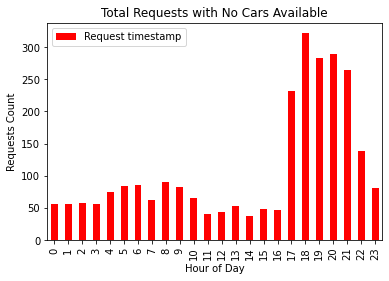

In [272]:
# Plot of no cars available with hour of day
pd.DataFrame(data[data['Status'] == 'No Cars Available']['Request timestamp'].dt.hour.value_counts()).sort_index().plot.bar(color='r')
plt.xlabel('Hour of Day')
plt.title('Total Requests with No Cars Available')
plt.ylabel('Requests Count')
# Maximum No cars available are in the evening 5 to 9

Text(0, 0.5, 'Requests Count')

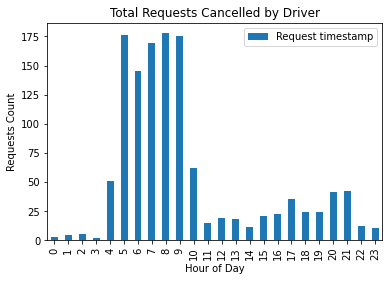

In [274]:
# Plot of cancelled cars
pd.DataFrame(data[data['Status'] == 'Cancelled']['Request timestamp'].dt.hour.value_counts()).sort_index().plot.bar()
plt.xlabel('Hour of Day')
plt.title('Total Requests Cancelled by Driver')
plt.ylabel('Requests Count')
# Maximum cancelled cars are in morning 5 to 9

<AxesSubplot:>

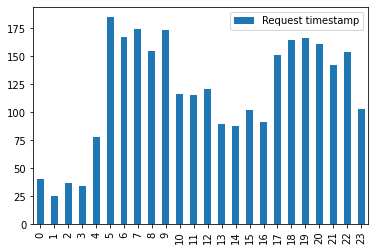

In [237]:
# Plot of completed trip
pd.DataFrame(data[data['Status'] == 'Trip Completed']['Request timestamp'].dt.hour.value_counts()).sort_index().plot.bar()
# Complete trips are similar in Morning and Evening

### Trip time Analysis

In [238]:
total_time=data['Drop timestamp']-data['Request timestamp']

In [239]:
data['trip_time'] = total_time.dt.seconds/60

In [240]:
data['trip_time'].mean()

52.413752502060596

In [241]:
data['booking_hour']= data['Request timestamp'].dt.hour

In [242]:
data.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,trip_time,booking_hour
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,69.000000,11
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,50.000000,17
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,41.000000,9
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,55.000000,21
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,52.516667,8


<AxesSubplot:xlabel='booking_hour'>

<Figure size 864x288 with 0 Axes>

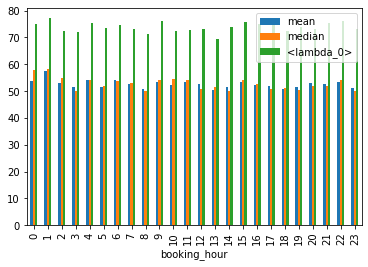

In [243]:
# Mean Trip time for different booking hours
plt.figure(figsize=(12,4))
data[data.trip_time.isnull()==False][['booking_hour','trip_time']].groupby(['booking_hour'])['trip_time'].agg(['mean','median',lambda x: np.quantile(x,0.95)]).plot.bar()
# Trip time doesnt vary much

#### *_Answer 1: The Problem is that booking in the evening are not being able to meet due to lack of supply of cars at that time. There are also large cancelled trips in the morning time_*
##### *Few insights:* 
- Out of all booking 39 % of times cars werent available
- Inavailability of Cars peaks at Evening hours (5 to 9)

- 12% of trips have been cancelled 
- Cancelling of trips peaks in Morning hours (5 to 9)

#### *_Q2. Find out the gap between supply and demand and show the same using plots._*
- Find the time slots when the highest gap exists
- Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots

### Finding Highest Gaps

In [244]:
demand_supply= data.pivot_table(index='booking_hour',columns='Status',aggfunc='count',values='Request id')

In [245]:
demand_supply.columns

Index(['Cancelled', 'No Cars Available', 'Trip Completed'], dtype='object', name='Status')

In [246]:
demand_supply['Demand']= demand_supply.sum(axis=1)

In [247]:
demand_supply['Supply'] = demand_supply['Trip Completed']

In [248]:
demand_supply['Gap']=demand_supply['Demand']-demand_supply['Supply']

In [249]:
demand_supply.reset_index(level=0,inplace=True)

In [ ]:
# #Univariate analysis on Status column 
# status = pd.crosstab(index = uberReq["Status"], columns="count")     
# status.plot.bar()
# #Univariate analysis on Pickup Point column 
# pick_point = pd.crosstab(index = uberReq["Pickup point"], columns="count")     
# pick_point.plot.bar()
# #grouping by Status and Pickup point.
# uberReq.groupby(['Status', 'Pickup point']).size()
# # Visualizing the count of Status and Pickup point bivariate analysis
# sns.countplot(x=uberReq['Pickup point'],hue =uberReq['Status'] ,data = uberReq)
# #Request and Drop hours
# uberReq['Request Hour'] = uberReq['Request timestamp'].dt.hour
# #Time Slots
# uberReq['Request Time Slot'] = 'Early Morning'
# uberReq.loc[uberReq['Request Hour'].between(5,8, inclusive=True),'Request Time Slot'] = 'Morning'
# uberReq.loc[uberReq['Request Hour'].between(9,12, inclusive=True),'Request Time Slot'] = 'Late Morning'
# uberReq.loc[uberReq['Request Hour'].between(13,16, inclusive=True),'Request Time Slot'] = 'Noon'
# uberReq.loc[uberReq['Request Hour'].between(17,21, inclusive=True),'Request Time Slot'] = 'Evening'
# uberReq.loc[uberReq['Request Hour'].between(21,24, inclusive=True),'Request Time Slot'] = 'Night'
# #As Demand can include trips completed, cancelled or no cars available, we will create a column with 1 as a value
# uberReq['Demand'] = 1
# #As Supply can only be the trips completed, rest all are excluded, so we will create a column with 1 as a supply value trips completed and 0 otherwise.
# uberReq['Supply'] = 0
# uberReq.loc[(uberReq['Status'] == 'Trip Completed'),'Supply'] = 1
# #Demand Supply Gap can be defined as a difference between Demand and Supply
# uberReq['Gap'] = uberReq['Demand'] - uberReq['Supply']
# uberReq.loc[uberReq['Gap']==0,'Gap'] = 'Trip Completed'
# uberReq.loc[uberReq['Gap']==1,'Gap'] = 'Trip Not Completed'


<AxesSubplot:xlabel='booking_hour', ylabel='Gap'>

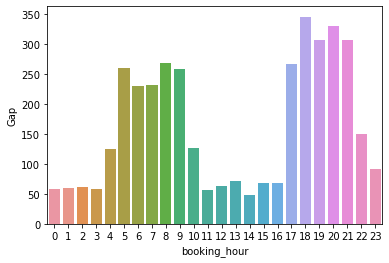

In [250]:
sns.barplot(data=demand_supply,x='booking_hour',y='Gap')
# Maximum Gap in Demand and Supply is in Evening 6 to 9 pm

### Type of Request 

In [251]:
pickup= data.pivot_table(index=['booking_hour','Pickup point'],columns=['Status'],aggfunc='count',values='Request id').fillna(0).reset_index()

In [252]:
pickup.head()

Status,booking_hour,Pickup point,Cancelled,No Cars Available,Trip Completed
0,0,Airport,0.0,30.0,23.0
1,0,City,3.0,26.0,17.0
2,1,Airport,0.0,29.0,13.0
3,1,City,4.0,27.0,12.0
4,2,Airport,0.0,25.0,16.0


In [253]:
pickup['gap']=pickup[['No Cars Available','Cancelled']].sum(axis=1)
pickup.head()

Status,booking_hour,Pickup point,Cancelled,No Cars Available,Trip Completed,gap
0,0,Airport,0.0,30.0,23.0,30.0
1,0,City,3.0,26.0,17.0,29.0
2,1,Airport,0.0,29.0,13.0,29.0
3,1,City,4.0,27.0,12.0,31.0
4,2,Airport,0.0,25.0,16.0,25.0


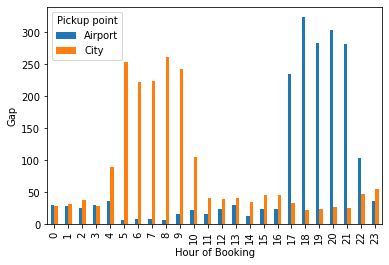

In [254]:
pickup.pivot_table(values='gap',index='booking_hour',columns='Pickup point',aggfunc='sum').plot.bar()
plt.xlabel('Hour of Booking')
plt.ylabel('Gap')
plt.show()
# Higher Gaps are seen from City to Airport in the Morning 
# Higher Gaps are seen from Airport to City in the Evening

*Answer 2 - Highest Gaps exist in Morning and Evening*
- More Severe Gap in Morning (5 to 9) is for City Pickup
- More Severe Gap in Evening (5 to 9) is for Airport Pickup

### Q3. What do you think is the reason for this issue for the supply-demand gap? Write the answer in less than 100 words.

*Answer 3- The reasons for the demand supply gap can be :*
- During the morning time : drivers might have a preference to start their day after 9 , thereby we are seeing more cancellations of booking in the morning ( gap is also high in City to Airport further justifying our assumptions).
- During the evening time : There is lesser availability of vehicles in the Airport, as drivers might have preference to operate in cities during closure of their service.

-  Please refer the presentation for different plots  

### Q4.  Recommend some ways to resolve the supply-demand gap.

*Answer 4 - Following are some possible approaches:*
 - Restrict number of cancellations allowed for Drivers , penalize them for more than limited cancellations
 - Onboard More Cars service providers on the platform
 - Find out location where Demand < Supply , and shift cars from those location to this place
 - The drivers can be incentivized more in cases where we see that Demand is higher but Supply is not there. The customers willing to pay extra in such scenarios as well.